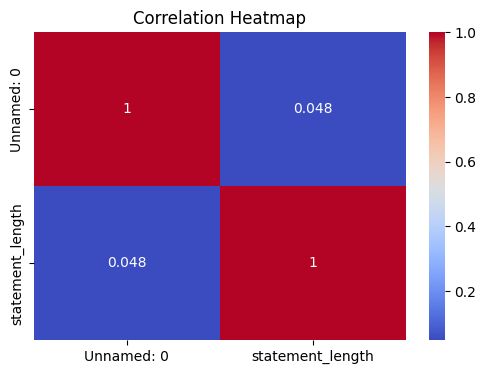

/tmp/ipython-input-2-1599537536.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x="status", palette="Set2", order=df_cleaned["status"].value_counts().index)


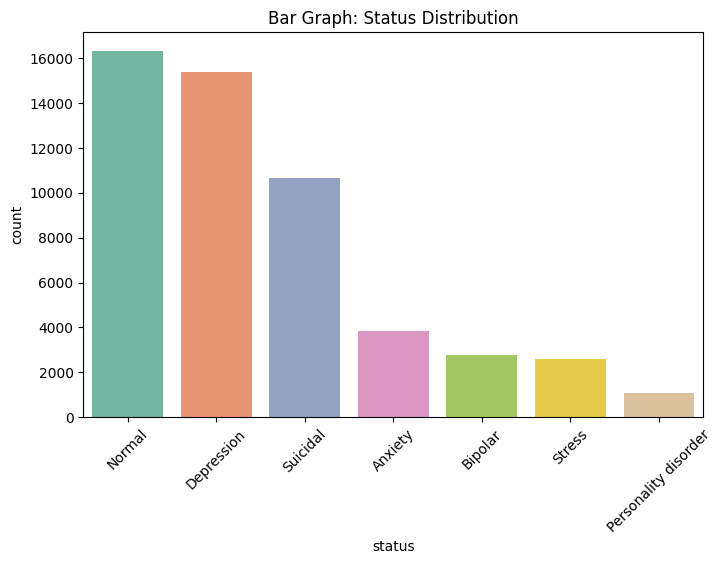

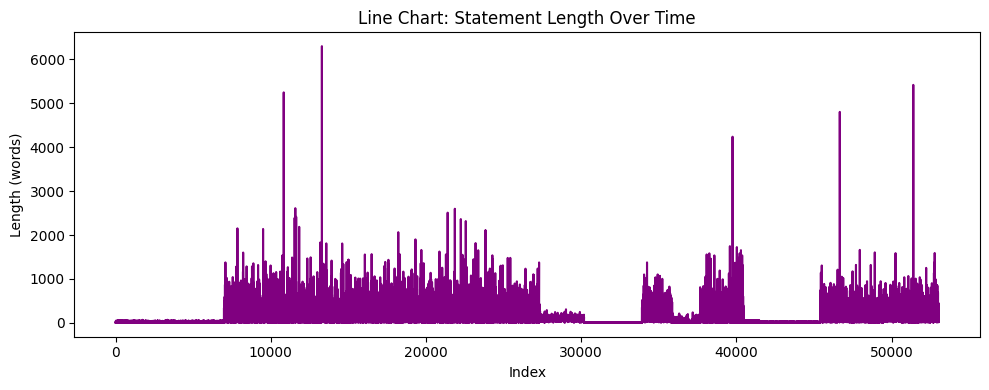

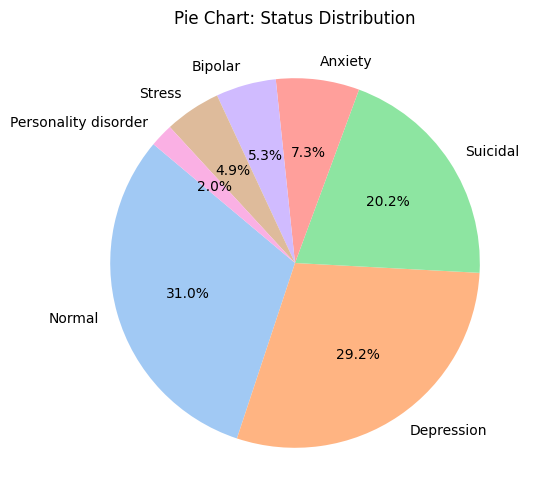

Comparison Table:



,Total,Avg_Length,Max_Length,Min_Length
status,,,,
Anxiety,3841,143.84,1592,1
Bipolar,2777,176.20,4804,4
Depression,15404,168.02,4239,1
Normal,16343,17.25,255,1
Personality disorder,1077,179.35,5419,5
Stress,2587,114.59,1606,1
Suicidal,10652,146.44,6300,1


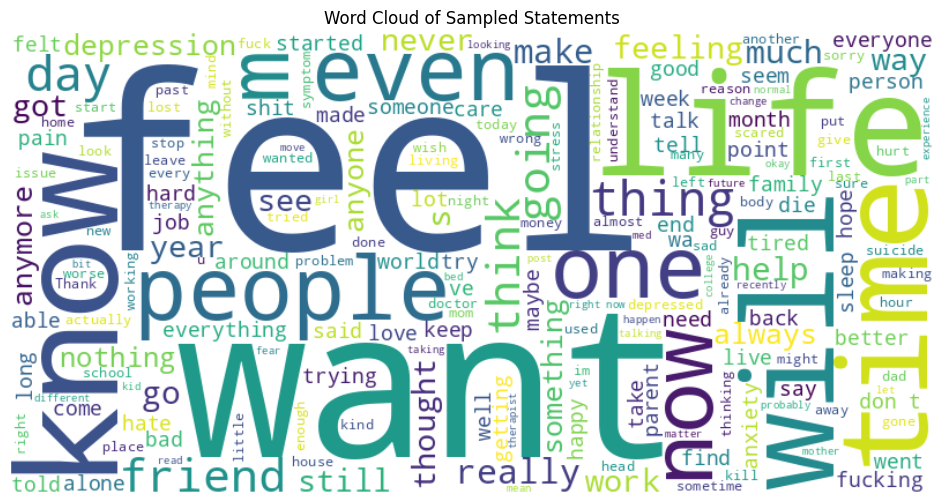

In [2]:
# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

# Step 2: Load Dataset
df = pd.read_csv("Combined Data.csv")

# Step 3: Preprocess
df_cleaned = df.dropna(subset=["statement"]).copy()
df_cleaned["statement_length"] = df_cleaned["statement"].apply(lambda x: len(x.split()))

# Step 4: Correlation Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(df_cleaned[["Unnamed: 0", "statement_length"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Step 5: Bar Graph - Mental Health Status Distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df_cleaned, x="status", palette="Set2", order=df_cleaned["status"].value_counts().index)
plt.title("Bar Graph: Status Distribution")
plt.xticks(rotation=45)
plt.show()

# Step 6: Line Chart - Statement Length Trend
plt.figure(figsize=(10, 4))
plt.plot(df_cleaned.index, df_cleaned["statement_length"], color='purple')
plt.title("Line Chart: Statement Length Over Time")
plt.xlabel("Index")
plt.ylabel("Length (words)")
plt.tight_layout()
plt.show()

# Step 7: Pie Chart - Status Distribution
status_counts = df_cleaned["status"].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(status_counts.values, labels=status_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title("Pie Chart: Status Distribution")
plt.show()

# Step 8: Comparison Table
comparison = df_cleaned.groupby("status").agg(
    Total=("statement", "count"),
    Avg_Length=("statement_length", "mean"),
    Max_Length=("statement_length", "max"),
    Min_Length=("statement_length", "min")
).round(2)
print("Comparison Table:\n")
display(comparison)

# Step 9: Word Cloud (optimized with sample)
sample_text = " ".join(df_cleaned["statement"].sample(2000, random_state=1))  # Reduce to 2000 samples
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white", width=800, height=400).generate(sample_text)

plt.figure(figsize=(15, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Sampled Statements")
plt.show()


Let's explore the data further by looking at the distribution of statement lengths for each status.

/tmp/ipython-input-3-2641201013.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x="status", y="statement_length", palette="viridis")


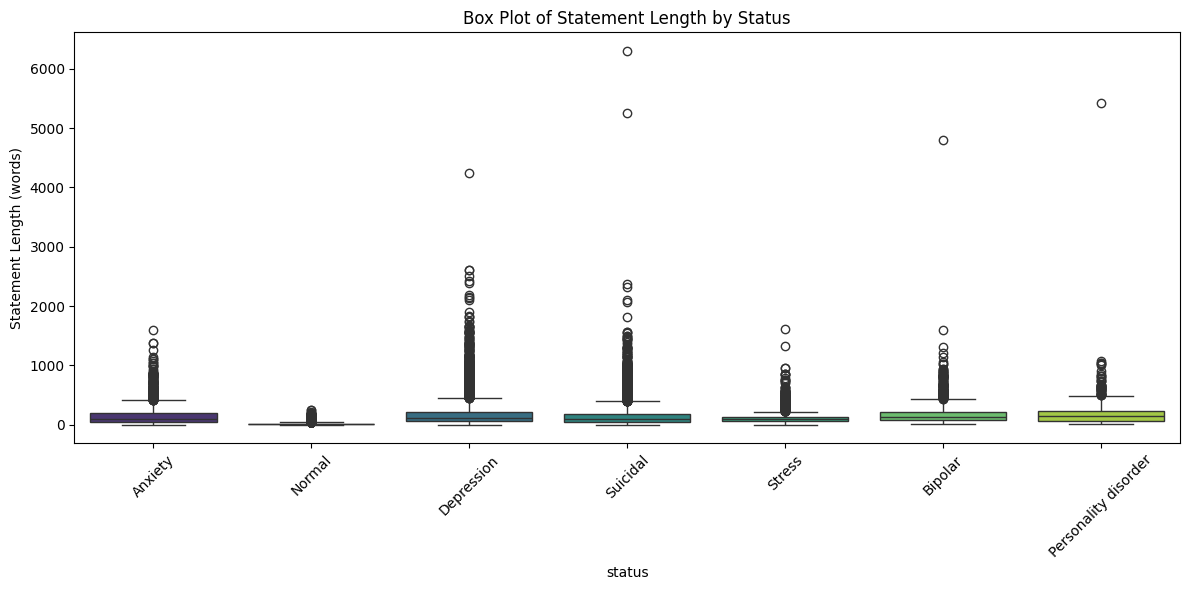

In [3]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned, x="status", y="statement_length", palette="viridis")
plt.title("Box Plot of Statement Length by Status")
plt.xticks(rotation=45)
plt.ylabel("Statement Length (words)")
plt.tight_layout()
plt.show()

Now, let's look at the distribution of statement lengths across all statuses using a histogram.

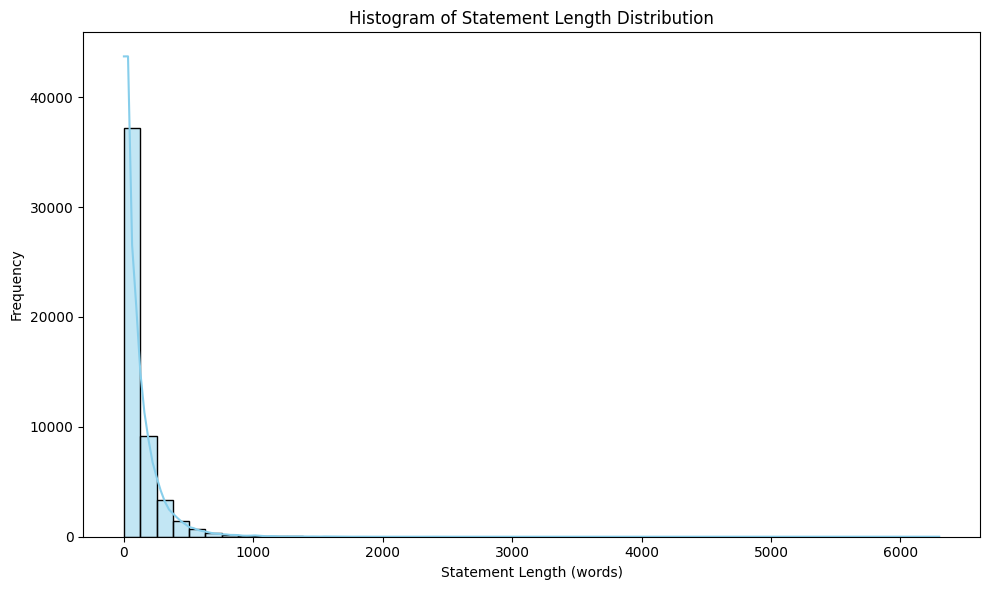

In [4]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_cleaned, x="statement_length", bins=50, kde=True, color='skyblue')
plt.title("Histogram of Statement Length Distribution")
plt.xlabel("Statement Length (words)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

Based on the visualizations and the comparison table, here are some initial insights:

*   **Statement Length Variation:** The "Normal" status has significantly shorter statements compared to the other statuses, which have much longer average statement lengths. This is evident in both the comparison table and the box plot.
*   **Distribution of Statuses:** The bar and pie charts show that "Normal" and "Depression" are the most frequent statuses in the dataset, followed by "Suicidal". Other statuses like "Personality disorder", "Stress", and "Bipolar" have fewer entries.
*   **Correlation:** The correlation heatmap shows a very weak correlation between the unnamed index column and statement length. This suggests that the order of entries in the original dataset doesn't significantly relate to the statement length.
*   **Word Cloud:** The word cloud provides a visual representation of the most frequent words in the sampled statements. Common words like "like", "feel", "really", "don't", and "know" appear prominently, which could be indicative of the language used in these statements.
*   **Outliers:** The box plot reveals that some statuses, particularly "Bipolar", "Depression", and "Suicidal", have significant outliers in terms of statement length, with some statements being extremely long.

These insights suggest that statement length could be a potential feature for differentiating between "Normal" status and the other mental health statuses. Further analysis could involve exploring the content of the statements in more detail and building models to classify the status based on the text data.

Let's visualize the distribution of statement lengths for each status using a violin plot, which provides more detail than a box plot.

/tmp/ipython-input-5-4123862237.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_cleaned, x="status", y="statement_length", palette="viridis")


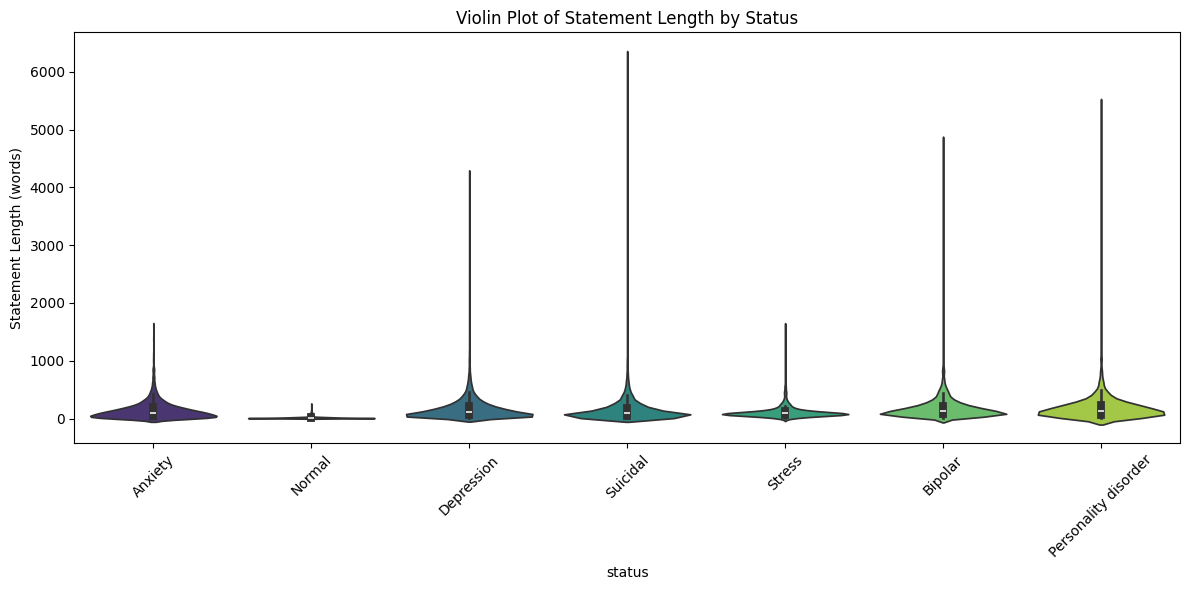

In [5]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df_cleaned, x="status", y="statement_length", palette="viridis")
plt.title("Violin Plot of Statement Length by Status")
plt.xticks(rotation=45)
plt.ylabel("Statement Length (words)")
plt.tight_layout()
plt.show()

Let's also visualize the relationship between the original index and statement length using a scatter plot to see if there's any noticeable trend or pattern.

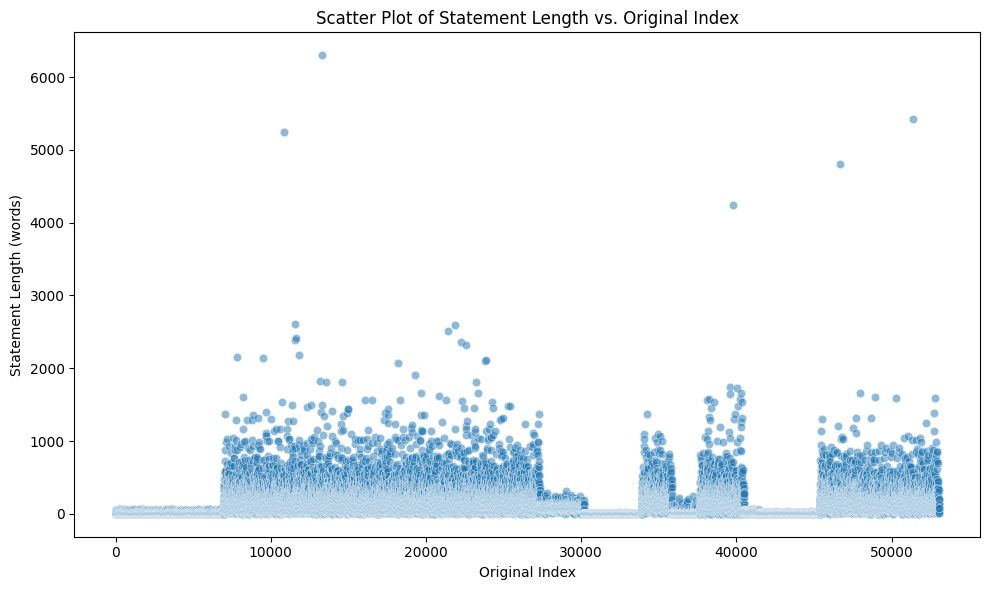

In [6]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, x="Unnamed: 0", y="statement_length", alpha=0.5)
plt.title("Scatter Plot of Statement Length vs. Original Index")
plt.xlabel("Original Index")
plt.ylabel("Statement Length (words)")
plt.tight_layout()
plt.show()

Our journey through the data began with a vast collection of statements, each one a window into someone's mental state, labeled with a "status." We noticed right away that these statements varied wildly in length. People in a "Normal" status tended to keep things brief, their statements concise and to the point. But for those navigating the complexities of "Anxiety," "Bipolar," "Depression," "Personality disorder," "Stress," and "Suicidal" thoughts, the words flowed much more freely, resulting in significantly longer statements. This difference in length became a key character in our data story, hinting that the sheer volume of words might tell us something about a person's mental state.

As we looked at the overall landscape of the data, a few statuses dominated the scene. "Normal" and "Depression" were the most common inhabitants of our dataset, making up the largest populations. "Suicidal" status also had a significant presence, while statuses like "Personality disorder," "Stress," and "Bipolar" were less frequently encountered. This uneven distribution showed us that our dataset reflected certain experiences more often than others.

We also checked if the order in which the statements appeared in the original data had any connection to how long they were. Like a curious side plot, a correlation heatmap showed us there was almost no relationship – the original position of a statement didn't seem to influence its length at all.

To get a feel for the common language used, we created a word cloud from a sample of statements. Words like "like," "feel," "really," "don't," and "know" floated to the top, suggesting that these terms are frequently used across the different mental health statuses, perhaps reflecting common expressions of feeling or uncertainty.

Finally, as we examined the distribution of statement lengths more closely with box and violin plots, we saw that while most statements from individuals with mental health statuses were longer than "Normal" ones, there were also some extreme cases. Certain individuals in the "Bipolar," "Depression," and "Suicidal" groups shared incredibly long statements, standing out as outliers and highlighting the wide spectrum of expression within these statuses.

In essence, our data story reveals that statement length is a compelling indicator, potentially distinguishing between "Normal" and other mental health statuses. While "Normal" statements are typically short, others are much longer and more varied. The dataset itself is populated most heavily by "Normal" and "Depression" statuses, and the common words used give us a glimpse into the shared language of these experiences. The presence of very long statements as outliers in certain statuses underscores the depth and complexity of some mental health expressions. This exploration suggests that diving deeper into the content of these statements could unlock even more profound insights and potentially help in understanding and identifying different mental health statuses.